In [1]:

import pandas as pd
from sklearn.linear_model import LogisticRegression



In [3]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 1A36-9B4C

 Directory of C:\Users\svats21\Documents\ExcelR

11-12-2021  12:07    <DIR>          .
11-12-2021  12:07    <DIR>          ..
11-12-2021  12:07    <DIR>          .ipynb_checkpoints
04-12-2021  11:25           370,510 AI [Regression ].ipynb
20-11-2021  11:28            87,155 beml_df.csv
05-12-2021  11:59             3,527 Cars.csv
20-11-2021  12:40         2,014,447 Chapter 1_ Descriptive Statistics and the Normal Distribution - Natural Resources Biometrics.pdf
20-11-2021  12:40         1,794,881 Chapter 2_ Sampling Distributions and Confidence Intervals - Natural Resources Biometrics.pdf
20-11-2021  12:41         3,432,196 Chapter 3_ Hypothesis Testing - Natural Resources Biometrics.pdf
11-12-2021  11:49            29,822 claimants (1).csv
20-11-2021  11:58            11,471 Confidence Interval.ipynb
20-11-2021  11:28            88,939 glaxo_df.csv
21-11-2021  11:47            15,282 Hypothesis Test.ipynb
11-12-2021  12:

In [4]:
#Load the data set
claimants = pd.read_csv("claimants (1).csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
claimants.shape

(1340, 7)

In [6]:
claimants["ATTORNEY"].value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

In [7]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [8]:
claimants.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891


In [9]:
#Shape of the data set
claimants.shape

(1340, 6)

In [10]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [11]:
claimants.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [14]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [15]:
claimants.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [18]:
claimants.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891


In [19]:
claimants["ATTORNEY"].value_counts()

0    578
1    518
Name: ATTORNEY, dtype: int64

In [20]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [21]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [22]:
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [23]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [24]:
classifier.intercept_

array([-0.17361679])

In [25]:
classifier.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

In [26]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [27]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_values': classifier.predict(X)})

In [22]:
y_pred_df

,actual,predicted_values
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [28]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [29]:
ac(Y,y_pred)

0.708029197080292

In [30]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [32]:
# ROC Curve

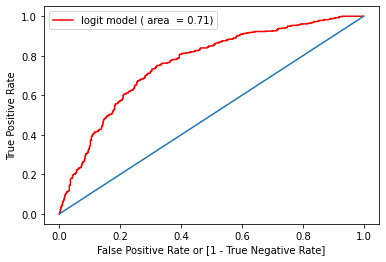

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()


In [30]:
auc

0.7108589063606365

# Mutilple classes

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac


Bad key "text.kerning_factor" on line 4 in
/Users/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=sns.load_dataset("iris")

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

In [4]:
data["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [8]:
x=data.iloc[:,:4]
y=data.iloc[:,4]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [10]:
x_train.shape

(105, 4)

In [11]:
y_train.shape

(105,)

In [14]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_train_pred=classifier.predict(x_train)

In [23]:
ac(y_train,y_train_pred)

0.9904761904761905

In [24]:
y_test_pred=classifier.predict(x_test)

In [25]:
y_test_pred

array(['virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [18]:
ac(y_test_pred,y_test)

0.9333333333333333

In [19]:
classifier.intercept_

array([  9.33507249,   2.34380433, -11.67887682])

In [20]:
classifier.coef_

array([[-0.43856351,  0.82502083, -2.27307316, -0.99359773],
       [ 0.49594639, -0.45385459, -0.23845567, -0.68428129],
       [-0.05738288, -0.37116625,  2.51152882,  1.67787902]])

In [20]:
set(y_train)

{'setosa', 'versicolor', 'virginica'}

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_pred,y_test)


array([[12,  0,  0],
       [ 0, 16,  1],
       [ 0,  2, 14]])

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      0.94      0.91        17
   virginica       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

